<a href="https://colab.research.google.com/github/shahd1995913/deep-learning/blob/main/Tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import the required library

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

## 2. Read the data

In [75]:
train = pd.read_csv('/content/train.csv')

## 3. Explore the data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      100000 non-null  int64  
 1   hotel                           100000 non-null  object 
 2   is_canceled                     100000 non-null  int64  
 3   lead_time                       100000 non-null  int64  
 4   arrival_date_year               100000 non-null  int64  
 5   arrival_date_month              100000 non-null  object 
 6   arrival_date_week_number        100000 non-null  int64  
 7   arrival_date_day_of_month       100000 non-null  int64  
 8   adults                          100000 non-null  int64  
 9   children                        99998 non-null   float64
 10  babies                          100000 non-null  int64  
 11  meal                            100000 non-null  object 
 12  country          

**Checking null  values**

In [13]:
train.isnull().sum()

Unnamed: 0                            0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13657
days_in_waiting_list                  0
customer_type                         0



**Handling null values By 🔃 :Fill NaN Values with Mode**


In [76]:
train['children'] = train['children'].fillna(train['children'].mode()[0])
train['country'] = train['country'].fillna(train['country'].mode()[0])

**❌ Drop this col due the very large the null values  13657**

In [77]:
train.drop(['agent'],axis=1,inplace=True)

**Plot the target class is_canceled**

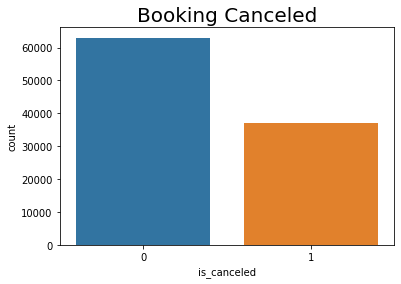

In [16]:
plt.title("Booking Canceled", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data=train)

**Check the most  market_segment**

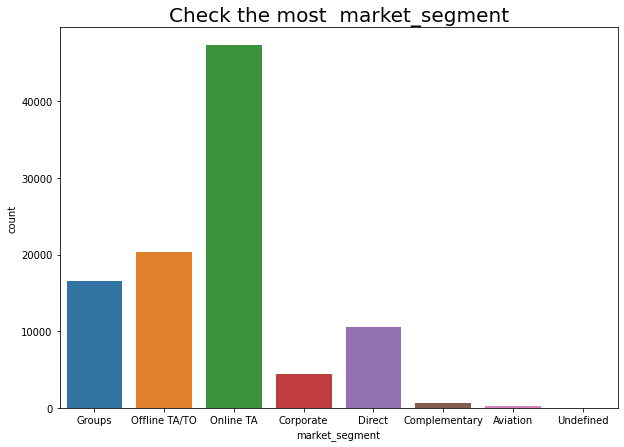

In [18]:
plt.figure(figsize = (10,7))
plt.title("Check the most  market_segment", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", data = train)


**Check the relation between the market_segment and the target class**

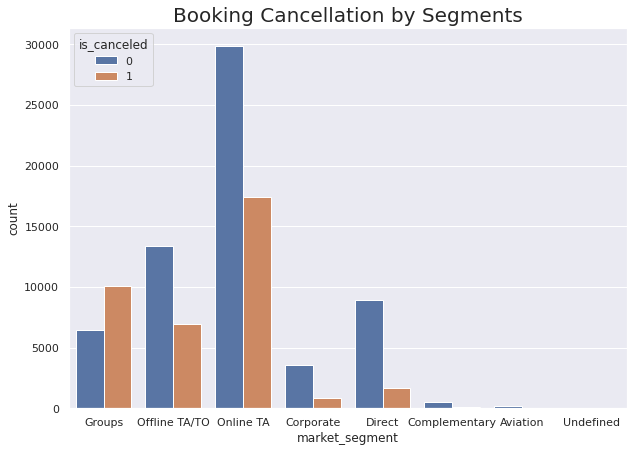

In [19]:
plt.figure(figsize = (10,7))
sns.set(style = "darkgrid")
plt.title("Booking Cancellation by Segments", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = train)

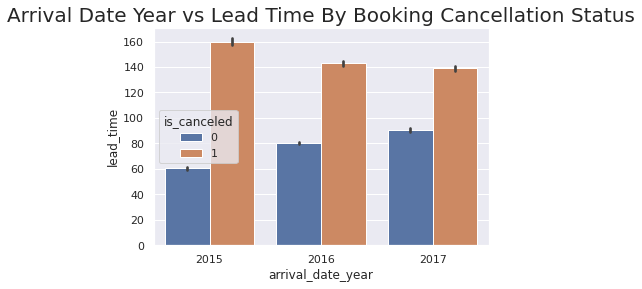

In [20]:
# Arrival Date Year vs. Lead Time By Booking Cancellation Status
sns.set(style = "darkgrid")
plt.title("Arrival Date Year vs Lead Time By Booking Cancellation Status", fontdict = {'fontsize': 20})
ax = sns.barplot(x = "arrival_date_year", y = "lead_time" ,hue = 'is_canceled', data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


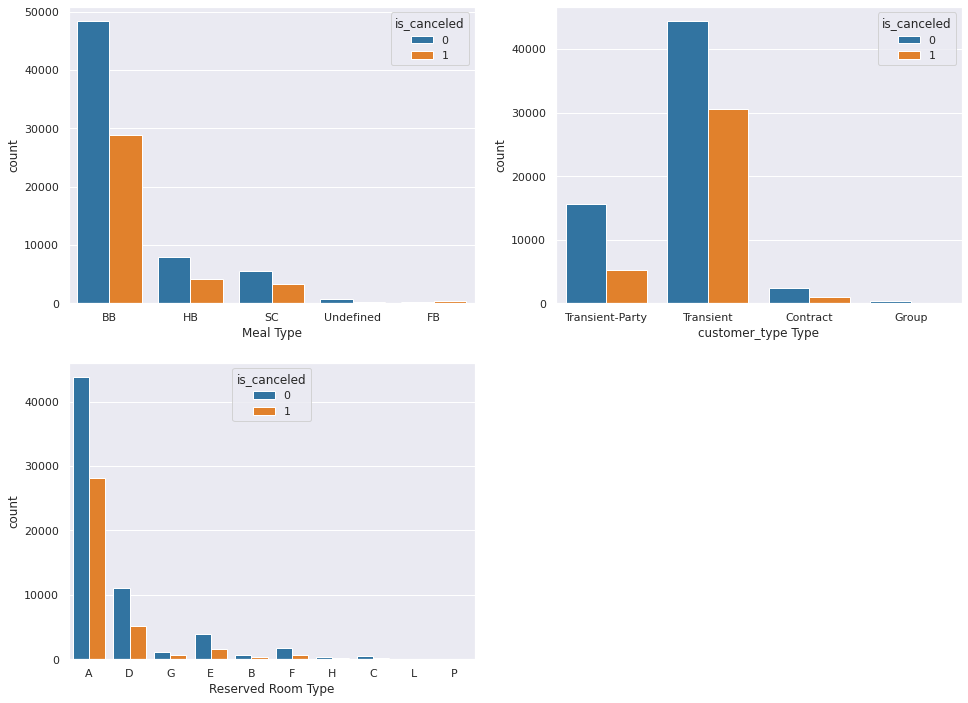

In [21]:
#Some subplot of remaining attributes:
plt.figure(figsize=(16,12))
sns.set(palette = "tab10")
plt.subplot(221)
sns.countplot(train['meal'], hue=train['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(train['customer_type'], hue=train['is_canceled'])
plt.xlabel('customer_type Type')
plt.subplot(223)
sns.countplot(train['reserved_room_type'], hue=train['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.show()

# 4. Prepare data for part modeling

## 4.1 data conversion from categorical to numerical data

In [78]:
train['arrival_date_month'] = pd.factorize(train['arrival_date_month'])[0]
train['hotel'] = pd.factorize(train['hotel'])[0]
train['arrival_date_year'] = pd.factorize(train['arrival_date_year'])[0]
train['customer_type'] = pd.factorize(train['customer_type'])[0]
train['deposit_type'] = pd.factorize(train['deposit_type'])[0]
train['assigned_room_type'] = pd.factorize(train['assigned_room_type'])[0]
train['reserved_room_type'] = pd.factorize(train['reserved_room_type'])[0]
train['country'] = pd.factorize(train['country'])[0]
train['meal'] = pd.factorize(train['meal'])[0]
train['market_segment'] = pd.factorize(train['market_segment'])[0]
train['distribution_channel'] = pd.factorize(train['distribution_channel'])[0]

## 4.2 Check the correlation between the data and target class 

In [79]:
correlation = train.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
deposit_type                      0.467293
lead_time                         0.291981
market_segment                    0.235521
total_of_special_requests         0.234051
required_car_parking_spaces       0.195243
distribution_channel              0.172999
booking_changes                   0.146003
hotel                             0.136746
assigned_room_type                0.133507
country                           0.123971
previous_cancellations            0.110477
customer_type                     0.085362
is_repeated_guest                 0.084627
adults                            0.061290
previous_bookings_not_canceled    0.057962
days_in_waiting_list              0.054150
reserved_room_type                0.049183
babies                            0.030791
arrival_date_year                 0.016712
arrival_date_month                0.010417
arrival_date_week_number          0.008985
arrival_date_day_of_month         0.005589
children   

## 4.3 Drop the data that have weak relationship with target class

In [80]:
# train= train.drop(columns = 'Unnamed: 0', axis = 1)
# train = train.drop(columns = 'children', axis = 1)
# train = train.drop(columns = 'meal', axis = 1)
# train= train.drop(columns = 'arrival_date_day_of_month', axis = 1)
# train= train.drop(columns = 'arrival_date_week_number', axis = 1)
# train= train.drop(columns = 'arrival_date_month', axis = 1)



# Drop the columns with weak relationship with the label class
train= train.drop(columns = 'Unnamed: 0', axis = 1)
train = train.drop(columns = 'children', axis = 1)
train = train.drop(columns = 'arrival_date_day_of_month', axis = 1)
train= train.drop(columns = 'arrival_date_week_number', axis = 1)
train = train.drop(columns = 'arrival_date_year', axis = 1)
train= train.drop(columns = 'days_in_waiting_list', axis = 1)
train = train.drop(columns = 'previous_bookings_not_canceled', axis = 1)
train = train.drop(columns = 'reserved_room_type', axis = 1)
train= train.drop(columns = 'arrival_date_month', axis = 1)
train = train.drop(columns = 'meal', axis = 1)
train = train.drop(columns = 'babies', axis = 1)


In [26]:
train

,hotel,is_canceled,lead_time,arrival_date_year,adults,babies,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,1,20,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,164,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,79,1,3,0,0,2,0,0,0,0,1,1,1,0,0,1,0,2
4,1,0,16,0,2,0,2,2,0,0,0,0,2,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,343,0,2,0,5,2,0,0,0,0,0,0,0,0,0,1,0,3
99996,1,1,14,1,1,0,21,2,0,0,0,0,2,2,0,0,0,1,0,0
99997,1,0,244,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
99998,0,0,158,0,2,0,10,4,2,0,0,0,3,3,0,0,0,1,0,0


# 5. Model part for train and test
## 5.1 Separate the features and labels for training:

In [81]:
df_features = train.copy()
df_labels = df_features.pop('is_canceled')

## 5.2 Make the features into a single NumPy array



In [86]:
df_features = np.array(df_features)
df_features

array([[  0,  20,   2, ...,   0,   0,   0],
       [  0,   1,   1, ...,   0,   0,   0],
       [  0, 164,   1, ...,   0,   0,   0],
       ...,
       [  1, 244,   2, ...,   0,   0,   0],
       [  0, 158,   2, ...,   1,   0,   0],
       [  1,  48,   2, ...,   1,   0,   0]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=32)
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_val_std=sc.transform(X_test)

## 5.3 layers.Normalization
### layer precomputes the mean and variance of each column, and uses these to normalize the data.



In [90]:
normalize = layers.Normalization()
normalize.adapt(df_features)

## 5.4 Bulid the tf Model

In [93]:
model = tf.keras.Sequential([
  normalize,
  # layers.Dense(64),
  # layers.Dense(1)
   tf.keras.layers.Dense(128,input_shape=(24,),activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.18),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam() , metrics=[ 'accuracy' ])


model.fit(X_train_std, y_train, epochs=20 , validation_data=(X_val_std,y_test),batch_size=64)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1468 - accuracy: 0.7917 - val_loss: 0.1428 - val_accuracy: 0.7971
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1397 - accuracy: 0.8020 - val_loss: 0.1397 - val_accuracy: 0.8014
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1382 - accuracy: 0.8036 - val_loss: 0.1391 - val_accuracy: 0.8019
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1373 - accuracy: 0.8040 - val_loss: 0.1385 - val_accuracy: 0.8005
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1366 - accuracy: 0.8044 - val_loss: 0.1380 - val_accuracy: 0.8050
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1362 - accuracy: 0.8051 - val_loss: 0.1374 - val_accuracy: 0.8033
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1355 - accuracy: 0.8055 - val_loss: 0.1370 - val_accuracy:

# 6. Check the acc of model 

In [94]:
results = model.evaluate(df_features,df_labels, batch_size=128)

782/782 [==============================] - 2s 2ms/step - loss: 0.1912 - accuracy: 0.7481


# 7. Test the test data

In [95]:
test = pd.read_csv('/content/test.csv')

In [39]:
test.isnull().sum()

Unnamed: 0                        0
hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [96]:
test.drop(['agent'],axis=1,inplace=True)

In [104]:
# test['arrival_date_month'] = pd.factorize(test['arrival_date_month'])[0]
test['hotel'] = pd.factorize(test['hotel'])[0]
# test['arrival_date_year'] = pd.factorize(test['arrival_date_year'])[0]
test['customer_type'] = pd.factorize(test['customer_type'])[0]
test['deposit_type'] = pd.factorize(test['deposit_type'])[0]
test['assigned_room_type'] = pd.factorize(test['assigned_room_type'])[0]
# test['reserved_room_type'] = pd.factorize(test['reserved_room_type'])[0]
test['country'] = pd.factorize(test['country'])[0]
# test['meal'] = pd.factorize(test['meal'])[0]
test['market_segment'] = pd.factorize(test['market_segment'])[0]
test['distribution_channel'] = pd.factorize(test['distribution_channel'])[0]

In [97]:
test= test.drop(columns = 'Unnamed: 0', axis = 1)
test = test.drop(columns = 'children', axis = 1)
test = test.drop(columns = 'arrival_date_day_of_month', axis = 1)
test= test.drop(columns = 'arrival_date_week_number', axis = 1)
test = test.drop(columns = 'arrival_date_year', axis = 1)
test= test.drop(columns = 'days_in_waiting_list', axis = 1)
test = test.drop(columns = 'previous_bookings_not_canceled', axis = 1)
test = test.drop(columns = 'reserved_room_type', axis = 1)
test= test.drop(columns = 'arrival_date_month', axis = 1)
test = test.drop(columns = 'meal', axis = 1)
test = test.drop(columns = 'babies', axis = 1)

In [105]:
df_test = np.array(test)
df_test

array([[  0, 433,   2, ...,   0,   0,   0],
       [  0,  18,   2, ...,   1,   0,   1],
       [  0,  63,   2, ...,   0,   0,   0],
       ...,
       [  0,   3,   2, ...,   0,   0,   2],
       [  1,  74,   2, ...,   0,   0,   0],
       [  0,  15,   2, ...,   0,   0,   0]])

In [106]:
X_test_std=sc.fit_transform(df_test)

In [107]:
predictions = model.predict(X_test_std)

522/522 [==============================] - 1s 1ms/step


In [113]:
predictions

array([[0.05038941],
       [0.6653491 ],
       [0.92065334],
       ...,
       [0.13123974],
       [0.9673516 ],
       [0.8529348 ]], dtype=float32)

In [120]:
predictionsupdate = np.where(predictions>.5 ,1,0)

In [71]:
# classes = np.argmax(predictions, axis = 1)
# print(classes)

AttributeError: ignored

In [121]:
# features = test.drop(['Unnamed: 0'],axis = 1)
# pred = norm_abalone_model.predict(features)
s = pd.DataFrame(predictionsupdate)
# idd = test[['Unnamed: 0']]
idd['is_canceled'] = s
s.value_counts()
idd.to_csv('submissiontpart8.csv', index=False)